#**Adicionando as bibliotecas que serão utilizadas**

In [ ]:
import pandas as pd
import numpy as np


import statsmodels.api as sm
import statsmodels.graphics.regressionplots as smg
from scipy import stats


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#**Abrindo o dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/gps_floripa.xlsx')

In [ ]:
df.head()

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc
0,2019-04-29,05:58:00,2019-04-29,08:05:00,Volta,135,50363,02:07:00,204,16.874
1,2019-04-29,11:11:00,2019-04-29,12:55:00,Volta,185,320,01:44:00,191,16.313
2,2019-04-05,17:25:00,2019-04-05,18:59:00,Volta,135,3322,01:34:00,166,16.874
3,2019-04-30,06:11:00,2019-04-30,08:03:00,Volta,135,50363,01:52:00,166,16.874
4,2019-04-10,11:55:00,2019-04-10,13:42:00,Ida,D267,11661,01:47:00,166,42.793


#**Analise exploratória dos dados**

In [ ]:
len(df)
# O df possui um total de 223402 registros.

223402

In [ ]:
# Não existem dados faltantes no dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223402 entries, 0 to 223401
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DataIni        223402 non-null  datetime64[ns]
 1   HoraIni        223402 non-null  object        
 2   DataFim        223402 non-null  datetime64[ns]
 3   HoraFim        223402 non-null  object        
 4   Sentido        223402 non-null  object        
 5   Linha          223402 non-null  object        
 6   NoVeículo      223402 non-null  int64         
 7   DuraçãoViagem  223402 non-null  object        
 8   TotalGiros     223402 non-null  int64         
 9   KmPerc         223402 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 17.0+ MB


In [ ]:
# O dataset possui informações de DuraçãoViagem = 0
df.sort_values(by="DuraçãoViagem", ascending=True).head(5)

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc
223401,2019-04-11,06:25:00,2019-04-11,06:25:00,Ida,D360V,50338,00:00:00,0,45.622
191958,2019-04-27,20:30:00,2019-04-27,20:30:00,Volta,262,11601,00:00:00,0,3.635
213191,2019-04-20,06:04:00,2019-04-20,06:04:00,Volta,271,312,00:00:00,0,13.848
213232,2019-04-26,05:49:00,2019-04-26,05:49:00,Volta,271,1459,00:00:00,0,13.848
213241,2019-04-27,06:07:00,2019-04-27,06:07:00,Volta,271,312,00:00:00,0,13.848


In [ ]:
# Removendo do dataset onde DuraçãoViagem = 0
# Como poderia 14.600 em 1 min ?
# Como poderia 16.560 em 12:36:00	?

df = df[df["HoraIni"] != df["HoraFim"]]
df.sort_values(by="DuraçãoViagem", ascending=True).head(223402)

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc
223400,2019-04-05,06:27:00,2019-04-05,06:28:00,Ida,D360V,50334,00:01:00,0,45.622
215450,2019-04-25,21:13:00,2019-04-25,21:14:00,Volta,461,5138,00:01:00,0,19.339
215442,2019-04-23,07:14:00,2019-04-23,07:15:00,Volta,461,45186,00:01:00,0,19.339
215436,2019-04-18,10:06:00,2019-04-18,10:07:00,Volta,461,34431,00:01:00,0,19.339
215431,2019-04-17,21:12:00,2019-04-17,21:13:00,Volta,461,5138,00:01:00,0,19.339
...,...,...,...,...,...,...,...,...,...,...
222177,2019-04-14,05:06:00,2019-04-15,14:30:00,Ida,231,11669,09:24:00,0,28.377
96317,2019-04-23,16:44:00,2019-04-24,02:11:00,Ida,4125,3088,09:27:00,15,32.429
186701,2019-04-25,20:37:00,2019-04-26,06:08:00,Ida,668,3303,09:31:00,1,7.652
153835,2019-04-18,15:00:00,2019-04-19,02:41:00,Volta,221,1547,11:41:00,5,26.837


In [ ]:
df['KmPerc'].describe()

count    218917.000000
mean         13.209288
std           8.146887
min           0.000000
25%           7.278000
50%          10.897000
75%          17.043000
max          45.622000
Name: KmPerc, dtype: float64

In [ ]:
# Transformando a DuraçãoViagem em minutos.
df['DuraçãoViagem'] = df['DuraçãoViagem'].apply(lambda x: x.hour * 60 + x.minute + x.second / 60)

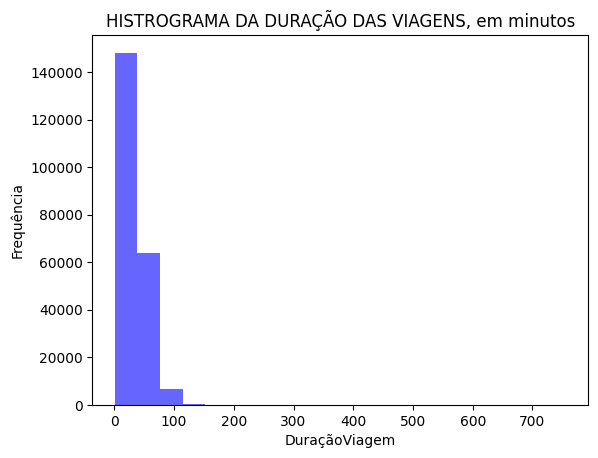

In [ ]:
# Criando o histograma da coluna 'DuraçãoViagem'.
plt.hist(df['DuraçãoViagem'], bins=20, color='blue', alpha=0.6)

# Personalizando o gráfico com rótulos e título.
plt.xlabel('DuraçãoViagem')
plt.ylabel('Frequência')
plt.title('HISTROGRAMA DA DURAÇÃO DAS VIAGENS, em minutos')

# Mostrando o histograma na tela.
plt.show()


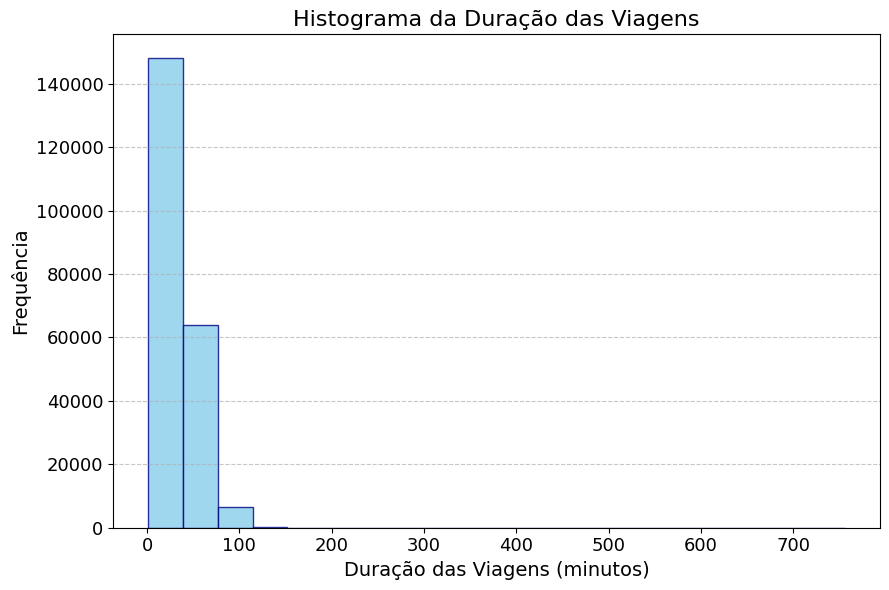

In [ ]:
plt.figure(figsize=(9, 6))  # Define o tamanho da figura.

plt.hist(df['DuraçãoViagem'], bins=20, color='skyblue', edgecolor='navy', alpha=0.8)

# Personalizando o gráfico com rótulos e título.
plt.xlabel('Duração das Viagens (minutos)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Histograma da Duração das Viagens', fontsize=16)

# Adicionando uma grade ao gráfico.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando legenda ao eixo x.
plt.xticks(fontsize=13)

# Adicionando legenda ao eixo y.
plt.yticks(fontsize=13)

# Mostrando o histograma na tela.
plt.tight_layout()
plt.show()


In [ ]:
# Verificando a quantidade distinta de linha de onibus em florianopolis, depois do tratamento.
len(df['Linha'].unique())

204

In [ ]:
# Criando uma coluna sobre dia da semana no DF
# Objetivo: Investigar se o dia da semana interfere na duração da viagem
df['DiaSemana'] = df['DataIni'].dt.weekday.map({
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo'
})

In [ ]:
df.head()

,DataIni,HoraIni,DataFim,HoraFim,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,DiaSemana
0,2019-04-29,05:58:00,2019-04-29,08:05:00,Volta,135,50363,127.0,204,16.874,Segunda-feira
1,2019-04-29,11:11:00,2019-04-29,12:55:00,Volta,185,320,104.0,191,16.313,Segunda-feira
2,2019-04-05,17:25:00,2019-04-05,18:59:00,Volta,135,3322,94.0,166,16.874,Sexta-feira
3,2019-04-30,06:11:00,2019-04-30,08:03:00,Volta,135,50363,112.0,166,16.874,Terça-feira
4,2019-04-10,11:55:00,2019-04-10,13:42:00,Ida,D267,11661,107.0,166,42.793,Quarta-feira


In [ ]:
# Não serão utilizadas DataIni, a informação relavante é o dia da semana
# Não será utilizada  DataFim e hora fim, pois se não, já temos a resposta do que queremos responder.
df.drop(columns=['DataIni',"DataFim", "HoraFim"], inplace=True)


In [ ]:
df.head()

,HoraIni,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,DiaSemana
0,05:58:00,Volta,135,50363,127.0,204,16.874,Segunda-feira
1,11:11:00,Volta,185,320,104.0,191,16.313,Segunda-feira
2,17:25:00,Volta,135,3322,94.0,166,16.874,Sexta-feira
3,06:11:00,Volta,135,50363,112.0,166,16.874,Terça-feira
4,11:55:00,Ida,D267,11661,107.0,166,42.793,Quarta-feira


In [ ]:
# Transformando a hora de inicio em minutos
# Objetivo: usar a datainicio nos modelos
df['Minuto_ini'] = df['HoraIni'].apply(lambda x: x.hour * 60 + x.minute)

In [ ]:
df.head()

,HoraIni,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,DiaSemana,Minuto_ini
0,05:58:00,Volta,135,50363,127.0,204,16.874,Segunda-feira,358
1,11:11:00,Volta,185,320,104.0,191,16.313,Segunda-feira,671
2,17:25:00,Volta,135,3322,94.0,166,16.874,Sexta-feira,1045
3,06:11:00,Volta,135,50363,112.0,166,16.874,Terça-feira,371
4,11:55:00,Ida,D267,11661,107.0,166,42.793,Quarta-feira,715


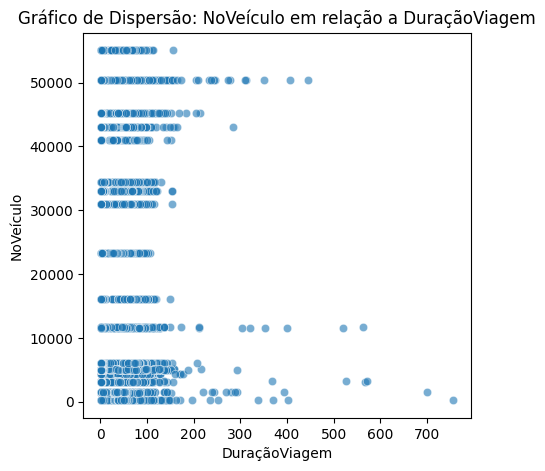

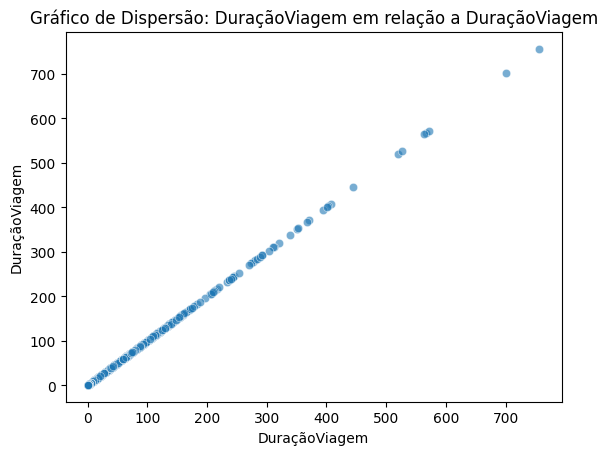

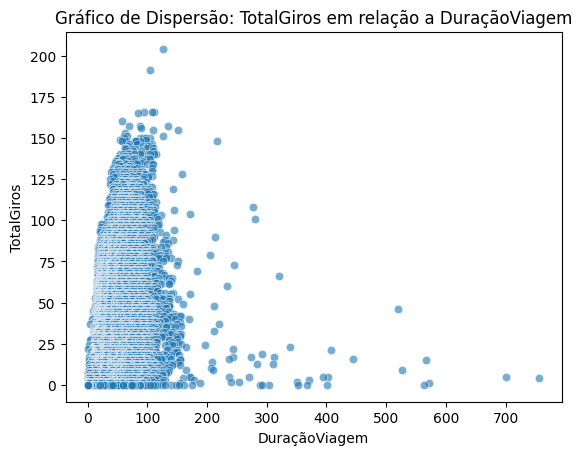

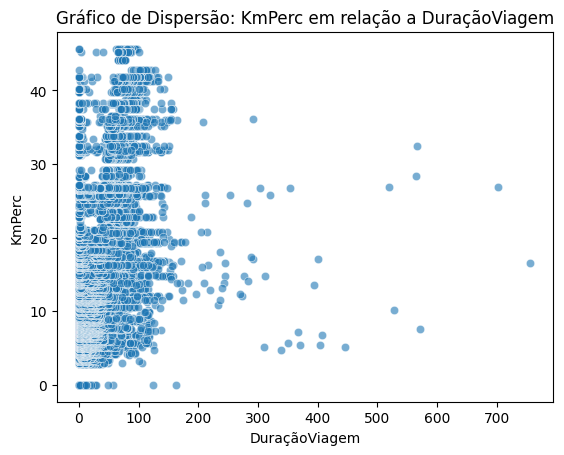

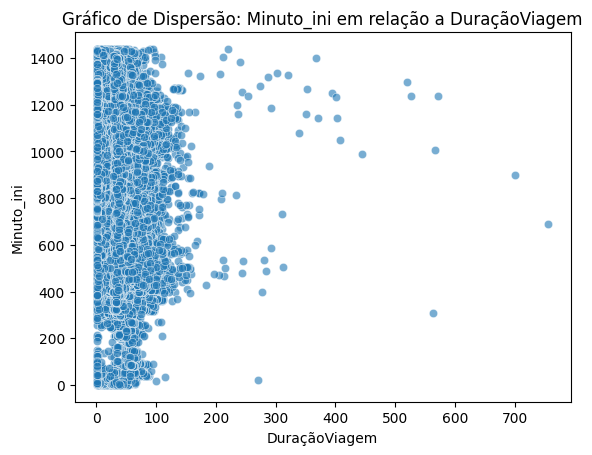

In [ ]:
# Extrai as colunas numéricas do DataFrame, exceto a coluna "DuraçãoViagem".
colunas_numericas = df.select_dtypes(include=[float, int]).columns.tolist()

# Plotando os gráficos de dispersão de todas as colunas numéricas em relação à coluna "DuraçãoViagem".
plt.figure(figsize=(5, 5))
for coluna in colunas_numericas:
    sns.scatterplot(data=df, x="DuraçãoViagem", y=coluna, alpha=0.6)
    plt.title(f"Gráfico de Dispersão: {coluna} em relação a DuraçãoViagem")
    plt.xlabel("DuraçãoViagem")
    plt.ylabel(coluna)
    plt.show()

# Isoladamente, nao se verifica nenhuma relação linear com a duração da viagem

In [ ]:
# transformando as variaveis qualitativas em quantitativas

# Selecionar apenas as colunas não numéricas
cols_to_encode = df.select_dtypes(exclude='number').columns

# Criar um dicionário para armazenar os mapeamentos
label_dict = {}

# Iterar sobre as colunas selecionadas e aplicar o LabelEncoder
for col in cols_to_encode:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_dict[col] = {label: category for label, category in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

print(label_dict)

{'HoraIni': {datetime.time(0, 0): 0, datetime.time(0, 1): 1, datetime.time(0, 2): 2, datetime.time(0, 3): 3, datetime.time(0, 4): 4, datetime.time(0, 5): 5, datetime.time(0, 6): 6, datetime.time(0, 7): 7, datetime.time(0, 8): 8, datetime.time(0, 9): 9, datetime.time(0, 10): 10, datetime.time(0, 11): 11, datetime.time(0, 12): 12, datetime.time(0, 13): 13, datetime.time(0, 14): 14, datetime.time(0, 15): 15, datetime.time(0, 16): 16, datetime.time(0, 17): 17, datetime.time(0, 18): 18, datetime.time(0, 19): 19, datetime.time(0, 20): 20, datetime.time(0, 21): 21, datetime.time(0, 22): 22, datetime.time(0, 23): 23, datetime.time(0, 24): 24, datetime.time(0, 25): 25, datetime.time(0, 26): 26, datetime.time(0, 27): 27, datetime.time(0, 28): 28, datetime.time(0, 29): 29, datetime.time(0, 30): 30, datetime.time(0, 31): 31, datetime.time(0, 32): 32, datetime.time(0, 33): 33, datetime.time(0, 34): 34, datetime.time(0, 35): 35, datetime.time(0, 36): 36, datetime.time(0, 37): 37, datetime.time(0, 38

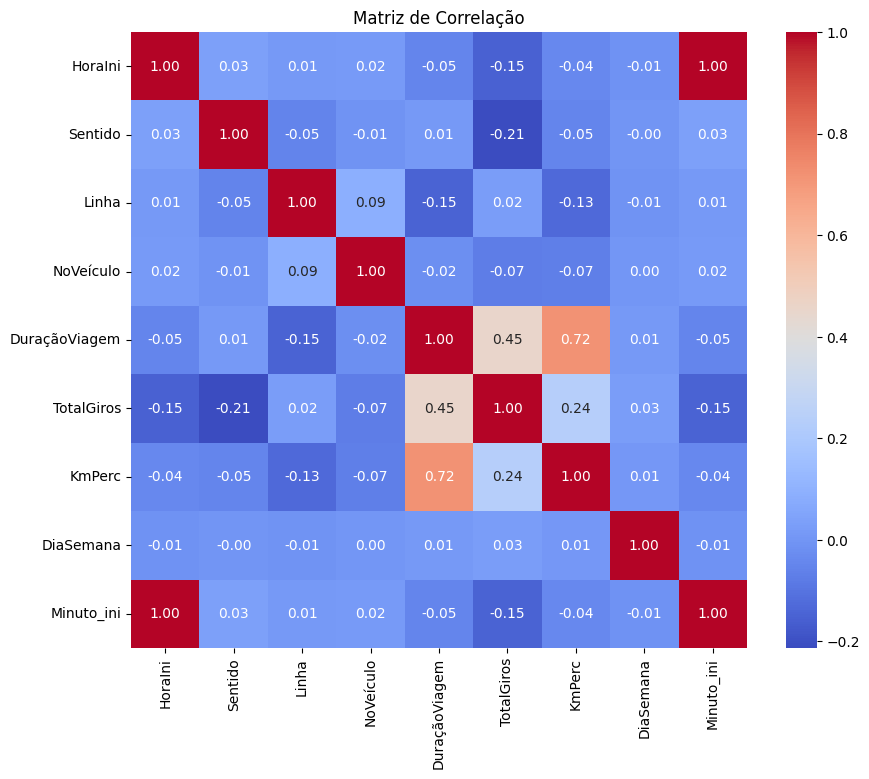

In [ ]:
correlation_matrix = df.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Configurar o título do gráfico
plt.title('Matriz de Correlação')

# Exibir o gráfico
plt.show()

Text(-12.430555555555555, 0.5, 'Contagem')

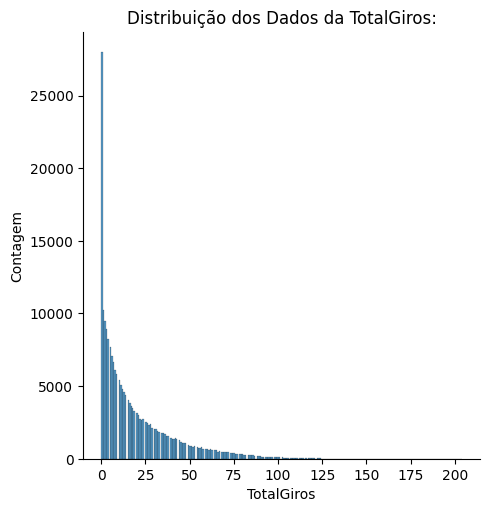

In [ ]:
#Distribuição do Total de Giros
sns.displot(data=df, x='TotalGiros')

plt.title(f"Distribuição dos Dados da TotalGiros:")
plt.xlabel('TotalGiros')
plt.ylabel("Contagem")

Text(-12.430555555555555, 0.5, 'Contagem')

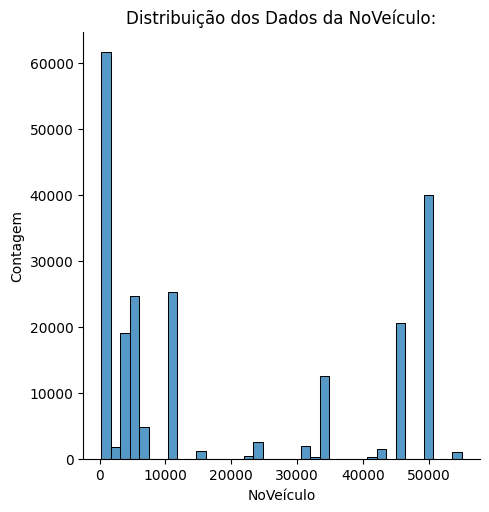

In [ ]:

sns.displot(data=df, x='NoVeículo')

plt.title(f"Distribuição dos Dados da NoVeículo:")
plt.xlabel('NoVeículo')
plt.ylabel("Contagem")

Text(-12.430555555555555, 0.5, 'Contagem')

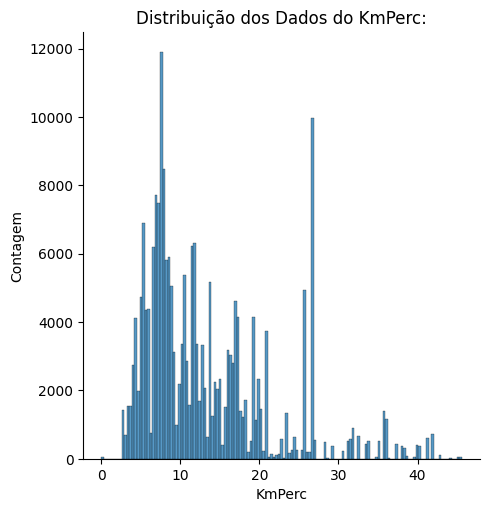

In [ ]:
#Distribuição do Total de Giros
sns.displot(data=df, x='KmPerc')

plt.title(f"Distribuição dos Dados do KmPerc:")
plt.xlabel('KmPerc')
plt.ylabel("Contagem")

In [ ]:
# Criando faixas de separação por regras de sturges.

num_bins = int(np.ceil(np.log2(len(df['DuraçãoViagem'])) + 1))

# Calcular o tamanho de cada faixa
bin_size = (df['DuraçãoViagem'].max() - df['DuraçãoViagem'].min()) / num_bins

# Criar as faixas
bins = [df['DuraçãoViagem'].min() + i * bin_size for i in range(num_bins + 1)]

# Criar a nova coluna 'STURGES' com as faixas correspondentes
df['STURGES'] = pd.cut(df['DuraçãoViagem'], bins=bins)

In [ ]:
df.head()

,HoraIni,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,DiaSemana,Minuto_ini,STURGES
0,294,1,22,50363,127.0,204,16.874,3,358,"(120.211, 159.947]"
1,607,1,59,320,104.0,191,16.313,3,671,"(80.474, 120.211]"
2,981,1,22,3322,94.0,166,16.874,4,1045,"(80.474, 120.211]"
3,307,1,22,50363,112.0,166,16.874,6,371,"(80.474, 120.211]"
4,651,0,191,11661,107.0,166,42.793,1,715,"(80.474, 120.211]"


#**Construção do modelo**

In [ ]:
# Criando a regressão linear
X = df[['DiaSemana', 'HoraIni', 'Linha', 'Sentido', 'NoVeículo', 'TotalGiros', 'KmPerc']]
y = df['DuraçãoViagem']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# O modelo explicou 62.3 % da variabilidade dos dados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          DuraçãoViagem   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                 5.171e+04
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:20:12   Log-Likelihood:            -8.4949e+05
No. Observations:              218917   AIC:                         1.699e+06
Df Residuals:                  218909   BIC:                         1.699e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6810      0.113     59.341      0.0

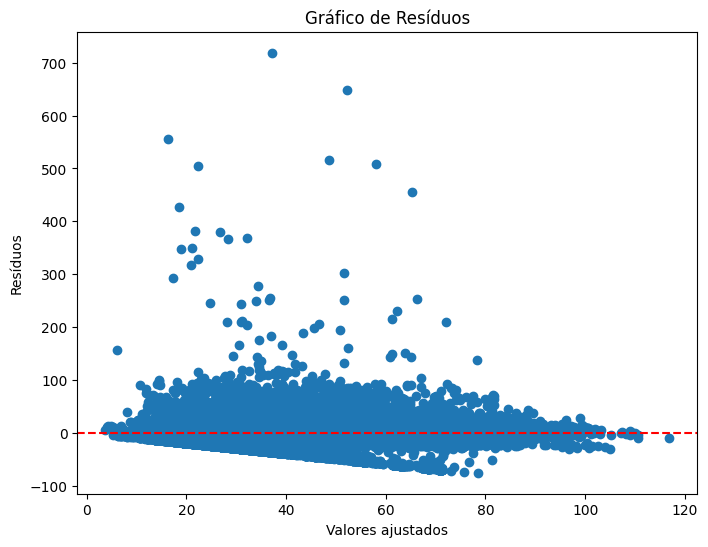

In [ ]:
# Verificando se os residúos estão com variância constante.
# Os resíduos precisam estar aleatoriamente distribuidos

# Calcular os resíduos
residuals = results.resid

# Plotar os resíduos
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(results.fittedvalues, residuals)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Valores ajustados')
ax.set_ylabel('Resíduos')
ax.set_title('Gráfico de Resíduos')

# Exibir o gráfico
plt.show()

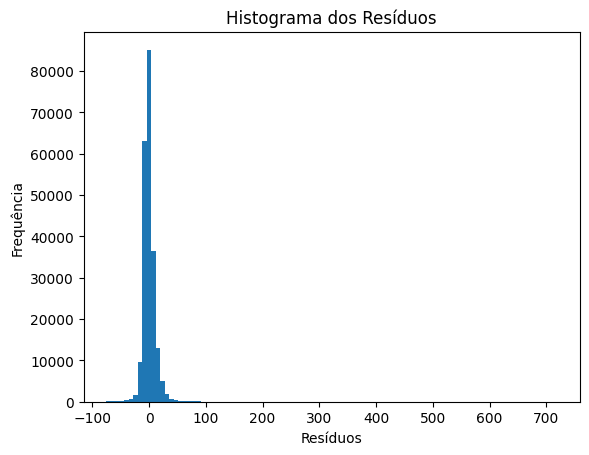

In [ ]:
# Calcular os resíduos
residuals = results.resid

# Plotar o histograma dos resíduos
plt.hist(residuals, bins=100)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

In [ ]:
# Construção do modelo sem outlier

# Calcular os valores de quartis e IQR
Q1 = df['DuraçãoViagem'].quantile(0.25)
Q3 = df['DuraçãoViagem'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para identificação de outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar os outliers no novo DataFrame
d_no_outliers = df[(df['DuraçãoViagem'] >= lower_limit) & (df['DuraçãoViagem'] <= upper_limit)]

# Exibir o novo DataFrame sem os outliers
len(d_no_outliers)

212727

In [ ]:
# Criando a regressão linear
X = d_no_outliers[['DiaSemana', 'HoraIni', 'Linha', 'Sentido', 'NoVeículo', 'TotalGiros', 'KmPerc']]
y = d_no_outliers['DuraçãoViagem']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# O modelo explicou 0.649 % da variabilidade dos dados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          DuraçãoViagem   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                 5.620e+04
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:20:15   Log-Likelihood:            -7.8052e+05
No. Observations:              212727   AIC:                         1.561e+06
Df Residuals:                  212719   BIC:                         1.561e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7816      0.093     83.679      0.0

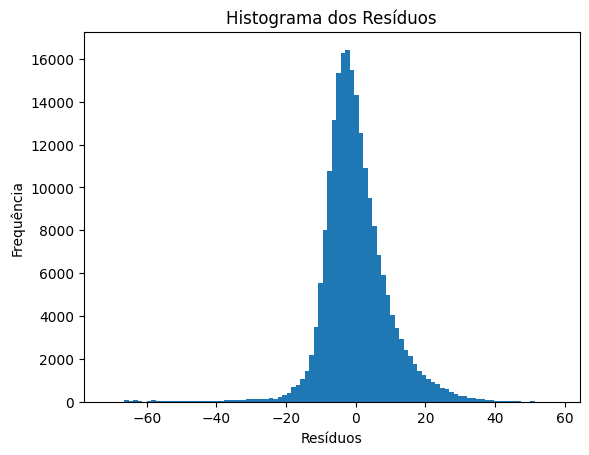

In [ ]:
# Calcular os resíduos
residuals = results.resid

# Plotar o histograma dos resíduos
plt.hist(residuals, bins=100)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

In [ ]:
# Aplicando a transformação de box-cox em Y para tentar deixar os resíduos normais.

# Aplicar a transformação de Box-Cox em y
transformed_y, lambda_value = stats.boxcox(y)
transformed_y, lambda_value

(array([14.1694537 , 15.70516299, 14.74269257, ...,  0.        ,
         0.        ,  0.        ]),
 0.5254730681968738)

In [ ]:
# Criando um dataframe 2 com y transformado
df.head()

,HoraIni,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,DiaSemana,Minuto_ini,STURGES
0,294,1,22,50363,127.0,204,16.874,3,358,"(120.211, 159.947]"
1,607,1,59,320,104.0,191,16.313,3,671,"(80.474, 120.211]"
2,981,1,22,3322,94.0,166,16.874,4,1045,"(80.474, 120.211]"
3,307,1,22,50363,112.0,166,16.874,6,371,"(80.474, 120.211]"
4,651,0,191,11661,107.0,166,42.793,1,715,"(80.474, 120.211]"


In [ ]:
df2 = df.copy()  # Cria uma cópia do DataFrame original.
df2['DuraçãoViagem'] = df2['DuraçãoViagem'] ** 0.39868456
df2.head()

,HoraIni,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,DiaSemana,Minuto_ini,STURGES
0,294,1,22,50363,6.898490,204,16.874,3,358,"(120.211, 159.947]"
1,607,1,59,320,6.370302,191,16.313,3,671,"(80.474, 120.211]"
2,981,1,22,3322,6.118650,166,16.874,4,1045,"(80.474, 120.211]"
3,307,1,22,50363,6.561326,166,16.874,6,371,"(80.474, 120.211]"
4,651,0,191,11661,6.442938,166,42.793,1,715,"(80.474, 120.211]"


In [ ]:
# Criando a regressão linear
X = df2[['DiaSemana', 'HoraIni', 'Linha', 'Sentido', 'NoVeículo', 'TotalGiros', 'KmPerc']]
y = df2['DuraçãoViagem']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          DuraçãoViagem   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                 4.427e+04
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:20:16   Log-Likelihood:            -1.8883e+05
No. Observations:              218917   AIC:                         3.777e+05
Df Residuals:                  218909   BIC:                         3.778e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6667      0.006    484.329      0.0

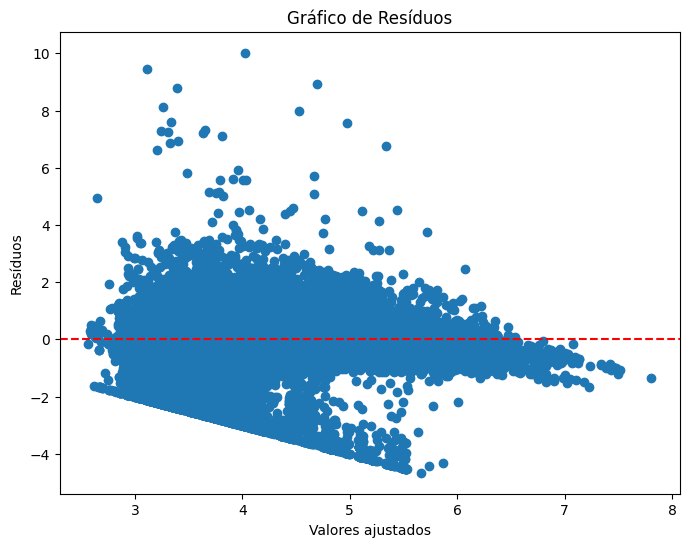

In [ ]:
# Verificando se os residúos estão com variância constante.
# Os resíduos precisam estar aleatoriamente distribuidos

# Calcular os resíduos
residuals = results.resid

# Plotar os resíduos
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(results.fittedvalues, residuals)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Valores ajustados')
ax.set_ylabel('Resíduos')
ax.set_title('Gráfico de Resíduos')

# Exibir o gráfico
plt.show()

# Os resíduos mostram que faltam variáveis no modelo para explicar a variabilidade dos dados
# A reta em baixo

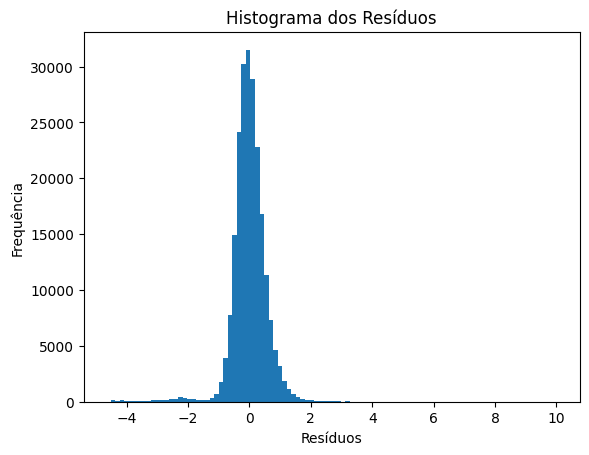

In [ ]:
# Calcular os resíduos
residuals = results.resid

# Plotar o histograma dos resíduos
plt.hist(residuals, bins=100)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

In [ ]:
len(df2)

218917

In [ ]:
# Criando um novo modelo sem outlier

# Calcular os valores de quartis e IQR
Q1 = df2['DuraçãoViagem'].quantile(0.25)
Q3 = df2['DuraçãoViagem'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para identificação de outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar os outliers no novo DataFrame
df3 = df2[(df2['DuraçãoViagem'] >= lower_limit) & (df2['DuraçãoViagem'] <= upper_limit)]

# Exibir o novo DataFrame sem os outliers
len(df3)

# 218917 - 215570 quantidade de outliers.

215570

In [ ]:
# Construção do modelo sem outlier

# Calcular os valores de quartis e IQR
Q1 = df3['TotalGiros'].quantile(0.25)
Q3 = df3['TotalGiros'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para identificação de outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar os outliers no novo DataFrame
d_no_outliers = df3[(df3['TotalGiros'] >= lower_limit) & (df3['TotalGiros'] <= upper_limit)]

# Exibir o novo DataFrame sem os outliers
len(d_no_outliers)

204970

In [ ]:
# Criando a regressão linear sem outlier
X = df_no_outliers[['DiaSemana', 'HoraIni', 'Linha', 'Sentido', 'NoVeículo', 'TotalGiros', 'KmPerc']]
y = df_no_outliers['DuraçãoViagem']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())
# Explicou 0.689 (Modelo escolhido)
# Y_novo = y ^ 3986 (transformação de boxcox)
# O dia da semana não se mostrou significativo.

                            OLS Regression Results                            
Dep. Variable:          DuraçãoViagem   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 6.831e+04
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:20:17   Log-Likelihood:            -1.3775e+05
No. Observations:              215570   AIC:                         2.755e+05
Df Residuals:                  215562   BIC:                         2.756e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6779      0.004    602.429      0.0

#**Modelo de regressão escolhido**

In [ ]:
# Criando a regressão linear sem outlier e dia da semana

X = df_no_outliers[[ 'HoraIni', 'Linha', 'Sentido', 'NoVeículo', 'TotalGiros', 'KmPerc']]
y = df_no_outliers['DuraçãoViagem']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          DuraçãoViagem   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 7.969e+04
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:20:18   Log-Likelihood:            -1.3775e+05
No. Observations:              215570   AIC:                         2.755e+05
Df Residuals:                  215563   BIC:                         2.756e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6777      0.004    651.413      0.0

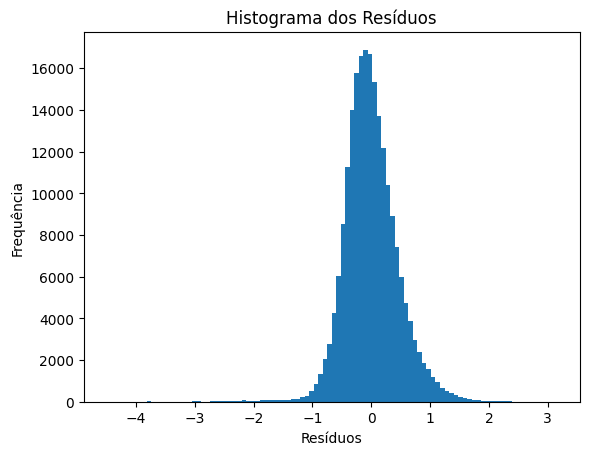

In [ ]:
# Calcular os resíduos
residuals = results.resid

# Plotar o histograma dos resíduos
plt.hist(residuals, bins=100)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

#**Construção do modelo de classificação**

In [ ]:
d_no_outliers.head()

,HoraIni,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,DiaSemana,Minuto_ini,STURGES
10837,1060,1,163,252,3.931723,65,4.018,2,1124,"(1.0, 40.737]"
10838,1089,1,163,254,3.775370,65,4.018,3,1153,"(1.0, 40.737]"
10839,954,0,80,11573,3.234591,65,5.040,3,1018,"(1.0, 40.737]"
10840,647,0,80,11573,3.301418,65,5.040,3,711,"(1.0, 40.737]"
10841,369,0,162,259,3.366266,65,5.164,3,433,"(1.0, 40.737]"


In [ ]:
d_no_outliers2 = d_no_outliers.copy()
d_no_outliers = d_no_outliers.dropna()


In [ ]:
# Aplicar o LabelEncoder
encoder = LabelEncoder()
d_no_outliers['sturges_encoded'] = encoder.fit_transform(d_no_outliers['STURGES'])

# Obtém os códigos numéricos únicos
codigos_numericos = d_no_outliers['sturges_encoded'].unique()

# Obtém os significados originais dos códigos
significados = encoder.inverse_transform(codigos_numericos)

# Cria um dicionário para mapear os códigos numéricos aos significados
mapeamento = dict(zip(codigos_numericos, significados))

In [ ]:
X = d_no_outliers.drop(['DuraçãoViagem','STURGES','sturges_encoded'], axis=1)
y = d_no_outliers['sturges_encoded']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Ou RandomForestRegressor para variável numérica
from sklearn.metrics import classification_report  # Ou outras métricas relevantes

# Separar os dados em conjunto de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo RandomForest.
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar o modelo aos dados de treinamento.
modelo_rf.fit(X_train, y_train)

# Fazer previsões usando o modelo.
y_pred = modelo_rf.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     45259
           1       0.87      0.85      0.86     15310
           2       0.74      0.52      0.61       922

    accuracy                           0.93     61491
   macro avg       0.85      0.78      0.81     61491
weighted avg       0.93      0.93      0.93     61491



#**Regressor - Duração da Viagem**

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score,explained_variance_score,mean_absolute_error
from sklearn.metrics import mean_squared_error,median_absolute_error

In [ ]:
d_no_outliers2

,HoraIni,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,DiaSemana,Minuto_ini,STURGES
10837,1060,1,163,252,3.931723,65,4.018,2,1124,"(1.0, 40.737]"
10838,1089,1,163,254,3.775370,65,4.018,3,1153,"(1.0, 40.737]"
10839,954,0,80,11573,3.234591,65,5.040,3,1018,"(1.0, 40.737]"
10840,647,0,80,11573,3.301418,65,5.040,3,711,"(1.0, 40.737]"
10841,369,0,162,259,3.366266,65,5.164,3,433,"(1.0, 40.737]"
...,...,...,...,...,...,...,...,...,...,...
223342,1159,0,13,6065,1.549605,0,41.777,3,1223,"(1.0, 40.737]"
223349,1096,0,13,16101,1.549605,0,41.777,6,1160,"(1.0, 40.737]"
223356,1167,0,13,6065,1.549605,0,41.777,1,1231,"(1.0, 40.737]"
223363,1093,0,13,16101,1.899628,0,41.777,2,1157,"(1.0, 40.737]"


In [ ]:
X = df_no_outliers[[ 'HoraIni', 'Linha', 'Sentido', 'TotalGiros', 'KmPerc','DiaSemana']]
y = df_no_outliers['DuraçãoViagem']

In [ ]:
# Separar os dados em conjunto de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size=0.3, random_state=42)

# Criar o modelo baseado em histogramas.
modelo_hist = HistGradientBoostingRegressor(categorical_features=['Linha','Sentido','DiaSemana'])

# Ajustar o modelo aos dados de treinamento.
modelo_hist.fit(X_train, y_train)



HistGradientBoostingRegressor(categorical_features=['Linha', 'Sentido',
                                                    'DiaSemana'])

In [ ]:
modelo_hist.score(X_train, y_train)

0.8800005469844333

In [ ]:
# Fazer previsões usando o modelo.
y_pred = modelo_hist.predict(X_test)

In [ ]:
print(f'Coeficiente R2: {r2_score(y_test,y_pred)}\n')
print(f'Variância explicada: {explained_variance_score(y_test,y_pred)}\n')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}\n')
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}\n')
print(f'Median Absolute Error: {median_absolute_error(y_test,y_pred)}\n')

Coeficiente R2: 0.876681122589924

Variância explicada: 0.8766890802799638

Mean Absolute Error: 0.19880499505049434

Mean Squared Error: 0.08339652879320085

Median Absolute Error: 0.14592218026651516



#**Regressor - Total de Giros**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
d_no_outliers2

,HoraIni,Sentido,Linha,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc,DiaSemana,Minuto_ini,STURGES
10837,1060,1,163,252,3.931723,65,4.018,2,1124,"(1.0, 40.737]"
10838,1089,1,163,254,3.775370,65,4.018,3,1153,"(1.0, 40.737]"
10839,954,0,80,11573,3.234591,65,5.040,3,1018,"(1.0, 40.737]"
10840,647,0,80,11573,3.301418,65,5.040,3,711,"(1.0, 40.737]"
10841,369,0,162,259,3.366266,65,5.164,3,433,"(1.0, 40.737]"
...,...,...,...,...,...,...,...,...,...,...
223342,1159,0,13,6065,1.549605,0,41.777,3,1223,"(1.0, 40.737]"
223349,1096,0,13,16101,1.549605,0,41.777,6,1160,"(1.0, 40.737]"
223356,1167,0,13,6065,1.549605,0,41.777,1,1231,"(1.0, 40.737]"
223363,1093,0,13,16101,1.899628,0,41.777,2,1157,"(1.0, 40.737]"


In [ ]:
X = df_no_outliers[[ 'HoraIni', 'Linha', 'Sentido', 'DuraçãoViagem', 'KmPerc','DiaSemana']]
y = df_no_outliers['TotalGiros']

In [ ]:
# Separar os dados em conjunto de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo baseado em histogramas.
modelo_hist2 = HistGradientBoostingRegressor(categorical_features=['Linha','Sentido','DiaSemana'])
modelo_rfor = RandomForestRegressor(random_state=0)  # Ou RandomForestRegressor para variável numérica.

# Ajustar o modelo aos dados de treinamento.
modelo_hist2.fit(X_train, y_train)
modelo_rfor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
modelo_hist2.score(X_train, y_train)

0.8326994735571749

In [ ]:
modelo_rfor.score(X_train, y_train)

0.9786228664454771

In [ ]:
y_pred = modelo_hist2.predict(X_test)
y_pred2 = modelo_rfor.predict(X_test)

In [ ]:
print("HISTOGRAMA\n")
print(f'Coeficiente R2: {r2_score(y_test,y_pred)}\n')
print(f'Variância explicada: {explained_variance_score(y_test,y_pred)}\n')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}\n')
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}\n')
print(f'Median Absolute Error: {median_absolute_error(y_test,y_pred)}\n')

HISTOGRAMA

Coeficiente R2: 0.8202177833822065

Variância explicada: 0.820236354351566

Mean Absolute Error: 6.00057832544676

Mean Squared Error: 82.62718760783883

Median Absolute Error: 3.7323850879447775



In [ ]:
print("RANDOM FOREST\n")
print(f'Coeficiente R2: {r2_score(y_test,y_pred2)}\n')
print(f'Variância explicada: {explained_variance_score(y_test,y_pred2)}\n')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred2)}\n')
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred2)}\n')
print(f'Median Absolute Error: {median_absolute_error(y_test,y_pred2)}\n')

RANDOM FOREST

Coeficiente R2: 0.8523309475922556

Variância explicada: 0.8524800175060708

Mean Absolute Error: 5.170459420741499

Mean Squared Error: 67.86810579327827

Median Absolute Error: 3.030000000000001

